# FB egonet dataset

In [1]:
from model.graph_mcmc import Graph_MCMC

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
import numpy as np


class Graph_Custom (Graph_MCMC):

    def get_feature_names(self):
        feature_name_map = self.G.graph_properties["feat_names"]
        names = []

        for i in range(0, len(feature_name_map)):
            name = feature_name_map[i]
            name = name.replace(";", "-")
            name = name.replace("anonymized feature ", "")
            names.append(name)
        
        return names


    def generate_feature_matrix(self):
        feat_map = self.G.vertex_properties["feat"]
        feat_names = self.get_feature_names()

        vertices = self.G.get_vertices()
        
        N = len(vertices)
        D = len(feat_names)
        X = np.empty((N, D))

        for vertex_index, vertex_id in enumerate(vertices):
            boolean_vector = feat_map[vertex_id]
            for prop_index in range(0, D):
                X[vertex_index, prop_index] = boolean_vector[prop_index]
        
        return X


In [4]:
graph = Graph_Custom()
graph.read_from_ns("ego_social/facebook_1912") #"soc_net_comms/amazon"

In [5]:
graph.print_info()

Graph with N=747 nodes, E=30025 edges and D=480 vertex features for training


In [6]:
graph.list_props()

name            (graph)   (type: string, val: ego_social (facebook_1912))
description     (graph)   (type: string, val: Ego networks associated with a
                                              set of accounts of three social
                                              media platforms (Facebook,
                                              Google+, and Twitter). Datasets
                                              include node features (profile
                                              metadata), circles, and ego
                                              networks, and were crawled from
                                              public sources in 2012)
citation        (graph)   (type: string, val: ['J. McAuley and J. Leskovec.
                                              "Learning to Discover Social
                                              Circles in Ego Networks." NIPS
                                              (2012). arxiv:1210.8182,
                      

In [7]:
graph.partition(B_min=10, B_max=10)

Performing inference...
Current bracket: (10, 10, 10) (50095.65412120641, 50095.65412120641, 50095.65412120641)
Current bracket: (10, 10, 10) (50095.65412120641, 50095.65412120641, 50095.65412120641)
Bisect at B = 10 with S = 50095.65412120641
Best result: B = 10, S = 50095.65412120641
Done


<VertexPropertyMap object with value type 'int32_t', for Graph 0x7f01c11d61c0, at 0x7f01c11afa90>

In [8]:
graph.mcmc(num_iter=10000)

100%|██████████| 10000/10000 [00:31<00:00, 313.69it/s]


66.92446115217776

Drawing soft partition


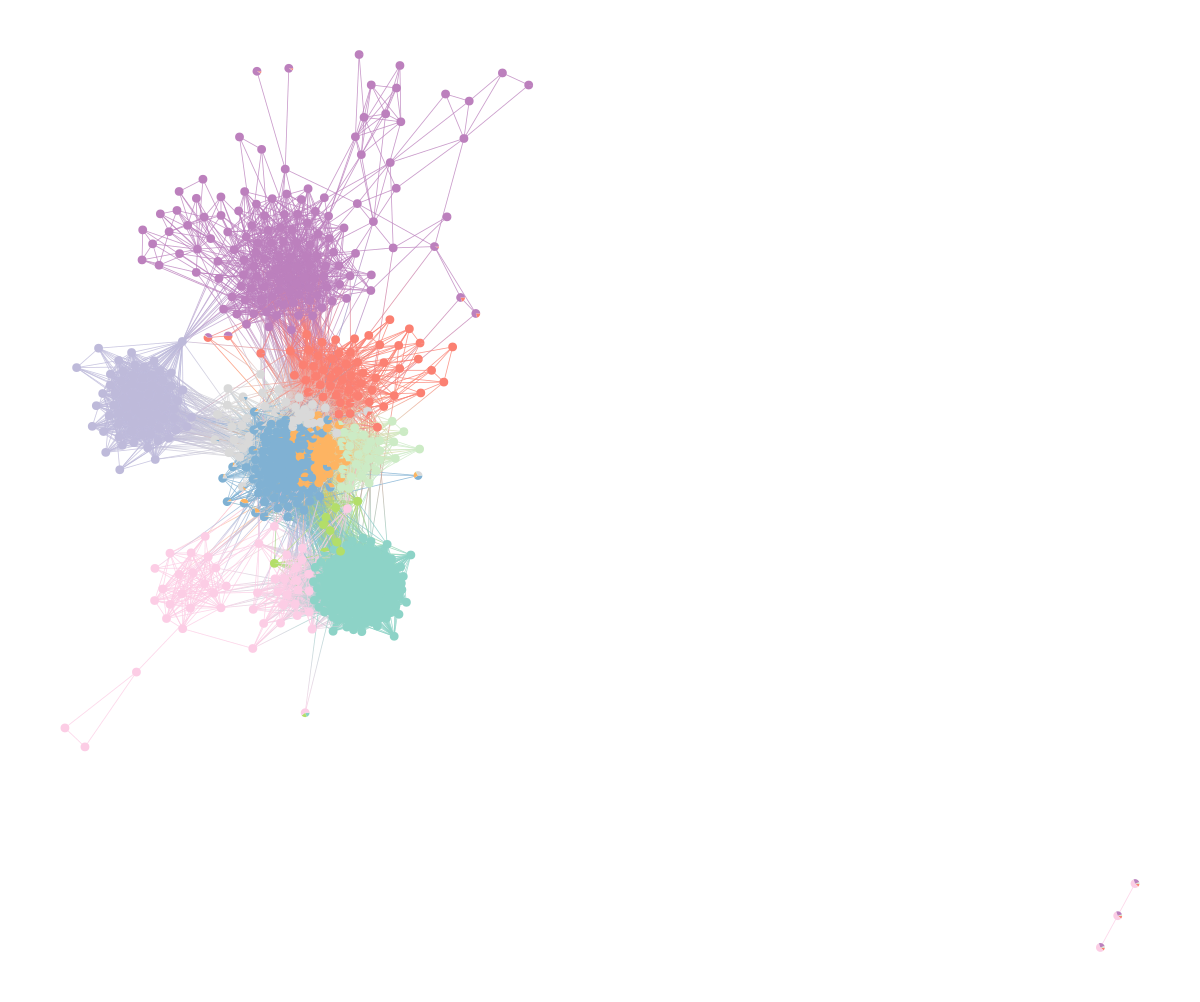

In [44]:
#graph.draw(gen_layout=False, output="fb-graph.png", size=4)
graph.draw(gen_layout=False, size=4)

Drawing block adjacency matrix $e_{rs}$


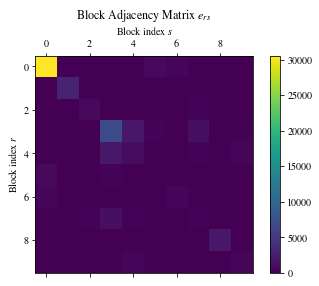

In [10]:
graph.plot_matrix()

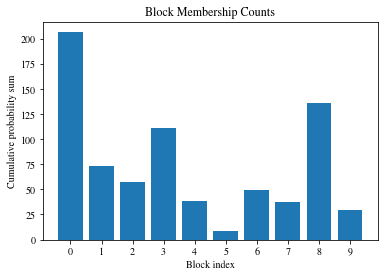

In [11]:
graph.plot_posterior_props()

## Train classifier

In [26]:
classifier = graph.sample_classifier_mala(10000, step_scaling=0.02, verbose=True)

100%|██████████| 10000/10000 [01:52<00:00, 88.81it/s]Sample accept ratio: 83.84%
Train. set accuracy: 63.05220883534136%



## Interpret results

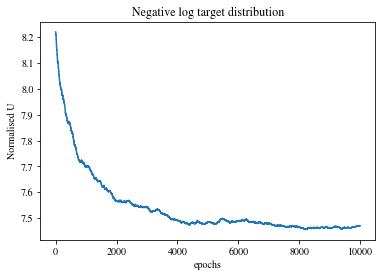

7.541404960142862

In [27]:
classifier.plot_U()

In [28]:
classifier.thin_samples(burn_in_pc=40, thinning_pc=50)

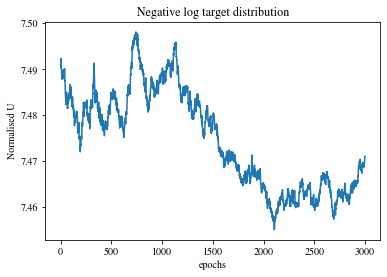

7.4744982015555825


In [29]:
u_mean = classifier.plot_U()
print(u_mean)

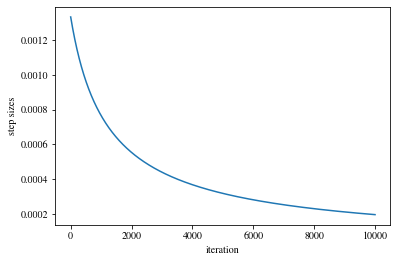

In [32]:
classifier.plot_step_sizes(10000)

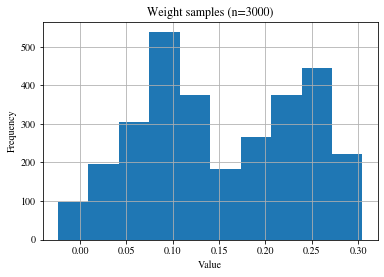

In [33]:
classifier.plot_sample_histogram()

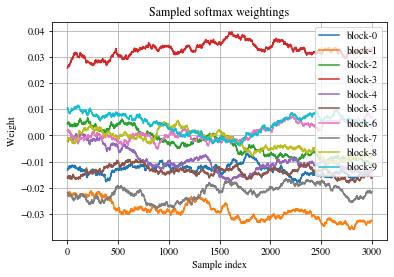

In [34]:
classifier.plot_sample_history()

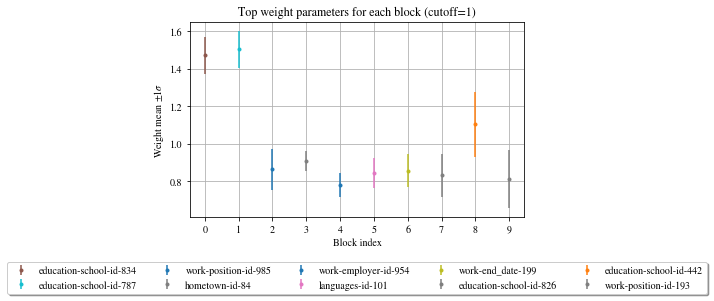

In [35]:
names = list(graph.get_feature_names())
classifier.plot_block_principal_dims(names, cutoff=1, legend=True)

iscarding feature 29: education-classes-id-749
Discarding feature 30: education-classes-id-750
Discarding feature 31: education-classes-id-751
Discarding feature 32: education-classes-id-752
Discarding feature 33: education-classes-id-753
Discarding feature 34: education-classes-id-754
Discarding feature 35: education-classes-id-755
Discarding feature 36: education-classes-id-756
Discarding feature 37: education-classes-id-757
Discarding feature 38: education-classes-id-11
Discarding feature 39: education-classes-id-758
Discarding feature 40: education-classes-id-759
Discarding feature 41: education-concentration-id-760
Discarding feature 42: education-concentration-id-13
Discarding feature 43: education-concentration-id-213
Discarding feature 44: education-concentration-id-386
Discarding feature 45: education-concentration-id-14
Discarding feature 46: education-concentration-id-761
Discarding feature 47: education-concentration-id-762
Discarding feature 48: education-concentration-id-

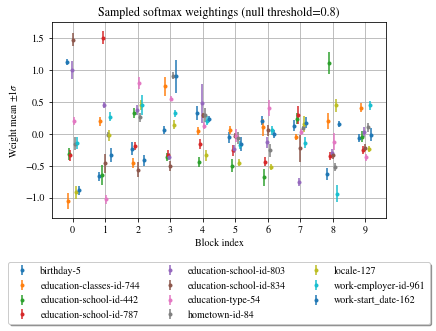

In [41]:
names = list(graph.get_feature_names())
classifier.plot_sampled_weights(names, std_dev_multiplier=1, null_space=0.8, legend=True, ncol=3, color_order=False)

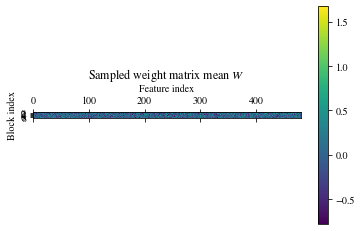

In [21]:
classifier.plot_sample_matrix()